### Machine Learning

Dentre as práticas de aprendizagem de máquina, temos:

Aprendizagem supervisionada:
A aprendizagem supervisionada é um tipo de abordagem em que um modelo de aprendizado de máquina é treinado usando um conjunto de dados rotulados. Nesse tipo de aprendizagem, cada exemplo de treinamento consiste em uma entrada (características) e uma saída desejada (rótulo). O objetivo é que o modelo aprenda a mapear corretamente as entradas para as saídas, de modo que possa generalizar e fazer previsões precisas para novos exemplos. Algoritmos comuns de aprendizagem supervisionada incluem regressão linear, árvores de decisão, redes neurais e algoritmos de classificação, como o SVM (Support Vector Machine) e o KNN (K-Nearest Neighbors).

Aprendizagem não supervisionada:
A aprendizagem não supervisionada é um tipo de abordagem em que um modelo de aprendizado de máquina é treinado em um conjunto de dados não rotulados, ou seja, não há informações sobre as saídas desejadas. O objetivo da aprendizagem não supervisionada é descobrir padrões, estruturas ou relações ocultas nos dados. Os algoritmos de aprendizagem não supervisionada são usados principalmente para agrupar os dados em clusters, encontrar associações entre os exemplos ou reduzir a dimensionalidade dos dados. Alguns exemplos de algoritmos de aprendizagem não supervisionada são o algoritmo K-means, a análise de componentes principais (PCA) e as redes neurais autoencoder.

Aprendizagem por reforço:
A aprendizagem por reforço é um tipo de abordagem em que um agente de aprendizado interage com um ambiente dinâmico. O agente recebe feedback positivo ou negativo, chamado de recompensa, com base em suas ações. O objetivo da aprendizagem por reforço é que o agente aprenda a tomar ações que maximizem a recompensa total ao longo do tempo. O agente aprende através de tentativa e erro, explorando o ambiente e ajustando sua estratégia com base no feedback recebido. Algoritmos de aprendizagem por reforço são amplamente usados em áreas como jogos, robótica e otimização de processos. O algoritmo Q-learning e o método Monte Carlo são exemplos populares de técnicas de aprendizagem por reforço.

### ScikitLearn

Scikit-learn é uma biblioteca popular de aprendizado de máquina em Python. Também conhecida como sklearn, ela fornece uma ampla gama de algoritmos de aprendizado de máquina supervisionado e não supervisionado, bem como ferramentas para pré-processamento de dados, avaliação de modelos e seleção de recursos.

Scikit-learn é amplamente utilizada devido à sua interface simples e consistente, facilitando o uso e a experimentação com diferentes algoritmos. A biblioteca possui uma documentação abrangente, além de uma comunidade ativa que contribui com exemplos e recursos adicionais.

Algumas das principais funcionalidades do scikit-learn incluem:

Implementação de algoritmos: Scikit-learn oferece implementações eficientes de uma variedade de algoritmos de aprendizado de máquina, como regressão linear, regressão logística, árvores de decisão, florestas aleatórias, SVM (Support Vector Machines), redes neurais, algoritmos de agrupamento, entre outros.

Pré-processamento de dados: Scikit-learn possui ferramentas para pré-processar dados antes de alimentá-los aos algoritmos de aprendizado de máquina. Isso inclui a normalização de dados, o tratamento de valores ausentes, a codificação de variáveis categóricas e a redução de dimensionalidade.

Avaliação de modelos: Scikit-learn oferece funções para avaliar o desempenho dos modelos de aprendizado de máquina. Isso inclui métricas de avaliação, como precisão, recall, F1-score, matriz de confusão, curvas ROC, entre outras. Também possui ferramentas para validação cruzada e divisão de conjuntos de treinamento e teste.

Seleção de recursos: Scikit-learn fornece métodos para selecionar as melhores características (variáveis) a serem usadas em um modelo de aprendizado de máquina. Isso ajuda a reduzir a dimensionalidade dos dados e melhorar a eficiência e a precisão dos modelos.

Scikit-learn é uma ferramenta muito útil para iniciar projetos de aprendizado de máquina, permitindo que desenvolvedores e cientistas de dados apliquem algoritmos de forma fácil e eficiente.

#### O algoritmo será usado para um exemplo de relação entre horas de estudo no mês e salário. Porém, é valido informar que essa relação tem finalidade didática e que para representar de maneira mais fidedigna a nossa realidade, seriam necessárias mais variáveis e dados. Isso se deve ao fato de que no mundo real todos possuem realidades diferentes, seja econômico ou social.

### Importação e visão geral

In [79]:
# importação

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # futuramente precisaremos separar dados de treino e teste

In [80]:
# carregando todos os dados necessários

df = pd.read_csv('data.csv')
df.shape # linhas e colunas


(500, 2)

In [81]:
df.columns # colunas

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [82]:
df.head() # primeiras linhas

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [83]:
df.info() # informações sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Análise exploratória e resumo estatístico

In [84]:
df.isnull().sum() # valores nulos

horas_estudo_mes    0
salario             0
dtype: int64

In [85]:
df.corr() # coeficientes de correlação. vai de -1 até +1, sendo -1 uma correlação negativa perfeita e +1 uma correlação positiva perfeita, próximo de 0 não há correlação.

# as diagonais são sempre 1 pois é a correlação de uma variável com ela mesma, ou seja, 100% de correlação. Já a outra metade da matriz é simétrica pois a correlação entre A e B é a mesma entre B e A.

# como nosso valor é próximo de 1, temos uma correlação positiva forte entre as variáveis.

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [86]:
df.describe() # estatísticas descritivas

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [87]:
# resumo estatístico da nossa variável preditora

df["horas_estudo_mes"].describe()

# queremos prever o salário com base nas horas de estudo por mês

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

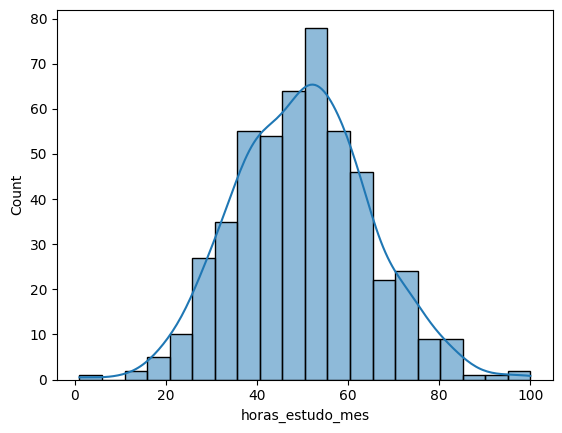

In [88]:
# Histograma da variável preditora

sns.histplot(data = df, x= "horas_estudo_mes", kde=True)
# KDE é o gráfico de densidade, que é uma suavização do histograma

O comportamento do gráfico indica normalidade de dados, não será preciso aplicar uma transformação.

### Preparação dos dados

In [89]:
# Preparando a variável de entrada X

X = np.array(df["horas_estudo_mes"])
type(X)

# temos como x a variável de entrada e como y a variável de saída

numpy.ndarray

O scikitlearn espera receber os dados no formato de matriz ou array.

In [90]:
X = X.reshape(-1,1) # transformando em matriz

In [91]:
# preparando a variável alvo

y = df["salario"]


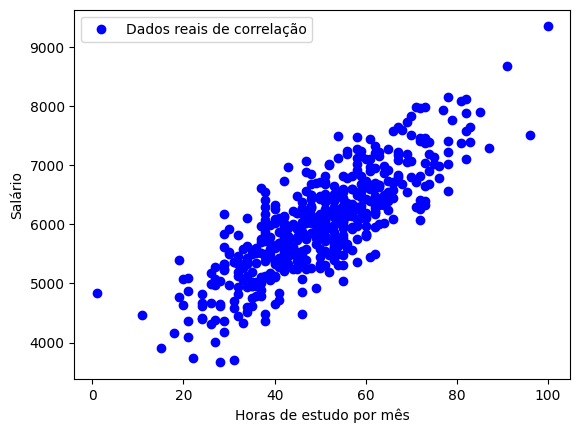

In [92]:
# gráfico de dispersão

plt.scatter(X,y, color = "blue", label = "Dados reais de correlação")
plt.xlabel("Horas de estudo por mês")
plt.ylabel("Salário")
plt.legend()
plt.show()


Não se pode tirar conclusões sobre causalidade, porém, podemos ver que de maneira geral, pessoas que recebem mais são as que dedicam mais horas de estudo ao mês. Então o salário não aumenta SÓ por causa das horas de estudo. Então o que temos aqui é uma correlação.

In [93]:
# Agora vamos dividir os dados entre treino e teste, sendo 30% para teste e 70% para treino.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [94]:
X_train.shape

(350, 1)

In [95]:
X_test.shape

(150, 1)

In [96]:
y_train.shape

(350,)

In [97]:
y_test.shape

(150,)

### Modelagem Preditiva

In [98]:
# Criando modelo de regressão linear simples

model =  LinearRegression()


In [99]:
# treina o modelo

model.fit(X_train, y_train)

LinearRegression()

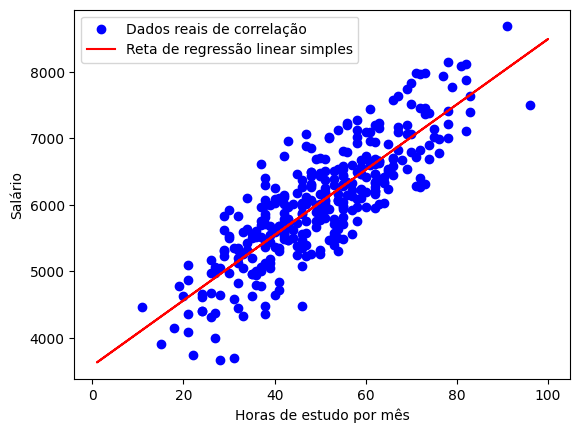

In [100]:
# visualiza uma reta de regressão linear e os dados reais usados no treinamento

plt.scatter(X_train, y_train, color = "blue", label = "Dados reais de correlação") # x e y originais
plt.plot(X, model.predict(X), color = "red", label = "Reta de regressão linear simples") # x e y previstos

plt.xlabel("Horas de estudo por mês") 
plt.ylabel("Salário")
plt.legend()

plt.show()

O modelo é aprendizado supervisionado, ou seja, temos os dados históricos. Alimentamos o algoritmo com uma variável para prever um valor numérico. Se estivéssemos tratando de uma doença, por exemplo, usaríamos classificação para prever um sim ou um não. Na clusterização não teremos a saída, apenas a entrada. Como encontrar clientes parecidos em uma certa região para venda de produtos.

In [101]:
# Avaliando o score do modelo

score = model.score(X_train, y_train)
print(f"Score do modelo R ao quadrado:, {score:.2f}")

# score do modelo é de o.70, ou seja, 70% da variância dos dados é explicada pelo modelo.

Score do modelo R ao quadrado:, 0.70


In [102]:
# Intercepto do modelo, parâmetro w0

intercepto = model.intercept_

# o intercepto é o valor de y quando x é igual a zero. Nesse caso, o salário quando o número de horas de estudo é zero.


In [103]:
# slope - parâmetro w1

slope = model.coef_


In [104]:
print(intercepto)
print(slope)

# Esses dois valores, intercepto e slope, são os parâmetros do modelo de regressão linear simples.
# Na regressão linear, a equação é y = w0 + w1*x
# Ou seja, como não sabíamos o parâmtetro w0 e w1, o modelo os encontrou para nós.
# Com isso, a reta de regressão linear simples pode ser calculada e mostrada.

# Na prática W0 é onde a linha de regressão cruza o eixo Y.
# W1 é o coeficiente angular da linha de regressão, ou cálculo de inclinação da reta.
# No fim das contas, machine learning é isso: encontrar os parâmetros que melhor se ajustam aos dados, ou mais precisamente: matemática.

3582.26515769166
[49.1199997]


### Deploy do modelo

In [105]:
# Definindo um novo valor para horas de estudo 

horas_estudo_new = np.array([[40.0]])

# previsão com o modelo treinado

salario_new = model.predict(horas_estudo_new)

print(f"Salário previsto para 40 horas de estudo por mês: {salario_new[0]:.2f}")

Salário previsto para 40 horas de estudo por mês: 5547.07


In [106]:
# mesmo resultado utilizando os parâmetros do modelo

salario_new = intercepto + slope*40

print(f"Salário previsto para 40 horas de estudo por mês: {salario_new[0]:.2f}")

Salário previsto para 40 horas de estudo por mês: 5547.07


In [107]:
# Segundo teste.

horas_estudo_new = np.array([[20.0]])

# previsão com o modelo treinado

salario_new = model.predict(horas_estudo_new)

print(f"Salário previsto para 20 horas de estudo por mês: {salario_new[0]:.2f}")

# mesmo resultado utilizando os parâmetros do modelo

salario_new = intercepto + slope*20

print(f"Salário previsto para 20 horas de estudo por mês: {salario_new[0]:.2f}")

Salário previsto para 20 horas de estudo por mês: 4564.67
Salário previsto para 20 horas de estudo por mês: 4564.67


Com isso, machine learning se resume em matemática aplicada a programação. Porém, é obrigatório que tenhamos o volume de dados necessários para a análise exploratória, limpeza e criação e adaptação do modelo para o uso final.